In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data


In [27]:
# Given data
ground_truth =      np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
model_prediction =  np.array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

male_ground_truth =         np.array([1, 1, 1, 1, 0, 0, 0, 0])
male_model_prediction =     np.array([1, 1, 1, 1, 0, 1, 0, 0])
female_ground_truth =       np.array([1, 1, 1, 1, 0, 0, 0, 0])
female_model_prediction =   np.array([0, 0, 0, 1, 1, 1, 0, 1])

# Confusion matrix

[[4 4]
 [3 5]]


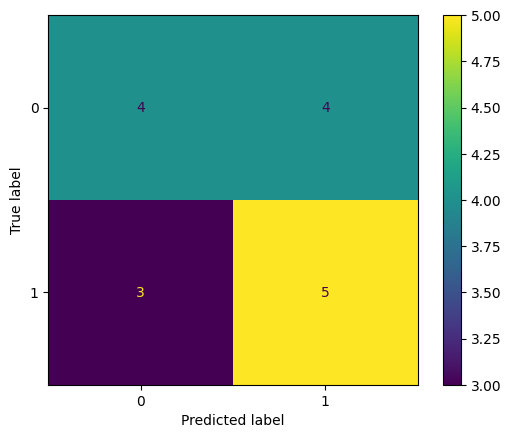

In [11]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(ground_truth, model_prediction)

print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
# plt.show()

# evaluation metrics

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(ground_truth, model_prediction)
precision = precision_score(ground_truth, model_prediction)
recall = recall_score(ground_truth, model_prediction)
f1 = f1_score(ground_truth, model_prediction)

print(f'Accuracy = {accuracy:.3f}')
print(f'Precision = {precision:.3f}')
print(f'Recall = {recall:.3f}')
print(f'F1 Score = {f1:.3f}')

Accuracy = 0.562
Precision = 0.556
Recall = 0.625
F1 Score = 0.588


# CHi2

In [25]:
from scipy.stats import chi2,chisquare
correct_predictions = np.sum(ground_truth == model_prediction)

# False Positives (FP) + False Negatives (FN)
incorrect_predictions = np.sum(ground_truth != model_prediction)
observed = [correct_predictions,incorrect_predictions] # model 1
expected = [8,8] #random guessing

# chi-square statistic & p-value
chi2, p_value = chisquare(observed,expected)

chi2, p_value

(0.25, 0.6170750774519739)

# male vs. female

In [28]:
from scipy.stats import chi2_contingency

# Constructing the contingency table for male and female accuracies
# The table will compare the correct and incorrect predictions for each gender
contingency_table_gender = np.array([
    [np.sum(male_ground_truth == male_model_prediction), np.sum(female_ground_truth == female_model_prediction)],  # Correct predictions
    [np.sum(male_ground_truth != male_model_prediction), np.sum(female_ground_truth != female_model_prediction)]   # Incorrect predictions
])

# Perform the chi-squared test for gender-based accuracy
chi2_stat_gender, p_val_gender= chi2_contingency(contingency_table_gender)

chi2_stat_gender, p_val_gender


(4.063492063492063, 0.043819792802674805)